In [4]:
import tensorflow_datasets as tfds
from tensorflow import keras
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [5]:
ds , info = tfds.load(
    'mnist',
    split=['train','test'],
    as_supervised=True,
    with_info=True
)

In [6]:
ds

[<_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

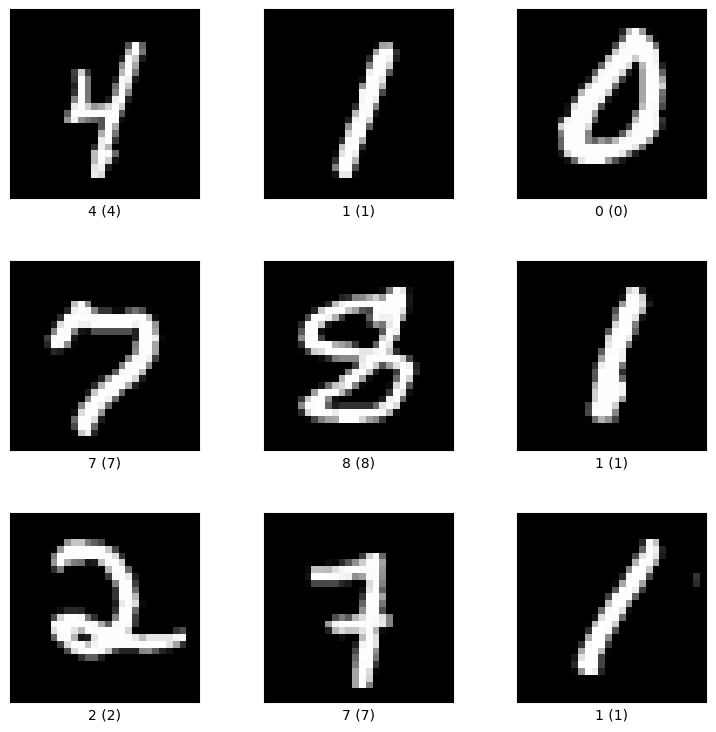

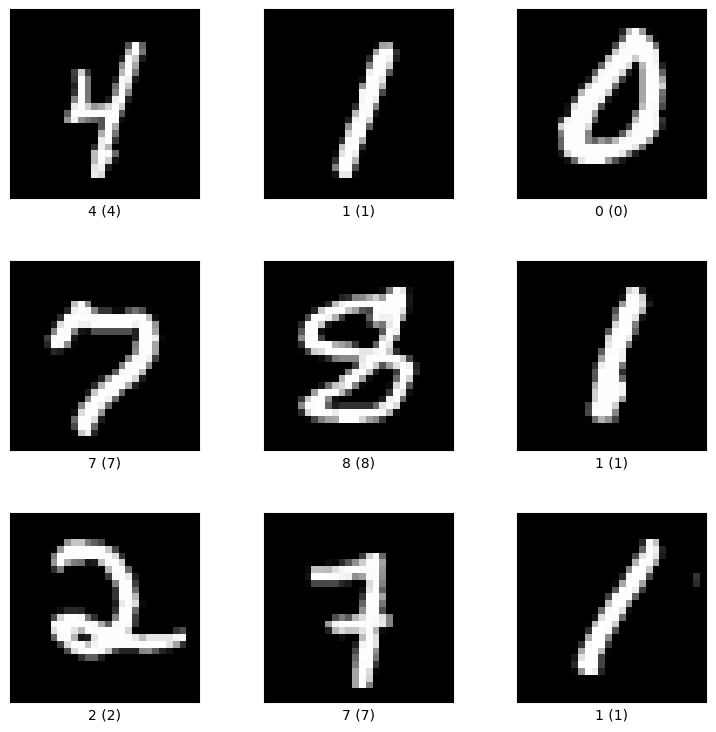

In [7]:
tfds.visualization.show_examples(ds[0],info)

In [8]:
ds_train = ds[0]
ds_test = ds [1]

In [9]:
def preprocess_dataset (img , label):
    image = tf.divide(tf.cast(img,tf.float32),255.)
    encode_label = tf.one_hot(label,depth=10)
    return image , encode_label

In [10]:
ds_train_per = ds_train.map(preprocess_dataset)
ds_test_per = ds_test.map(preprocess_dataset)

In [11]:
input_shape =(28,28,1)
num_classes = 10

In [28]:
input = tf.keras.Input(shape=input_shape)
x = layers.Conv2D(filters=32,padding='valid',kernel_size=(3,3),activation="relu", name= 'first_conv')(input)
x = layers.MaxPool2D(pool_size=(2,2))(x)
x = layers.Conv2D(filters=64,padding='valid',kernel_size=(3,3),activation="relu", name= 'seconed_conv')(x)
x = layers.MaxPooling2D(pool_size=(2, 2))(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
pred = layers.Dense(num_classes,activation='softmax')(x)

model = tf.keras.Model(inputs = [input] ,outputs = [pred])

In [30]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ first_conv (Conv2D)             │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ seconed_conv (Conv2D)           │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

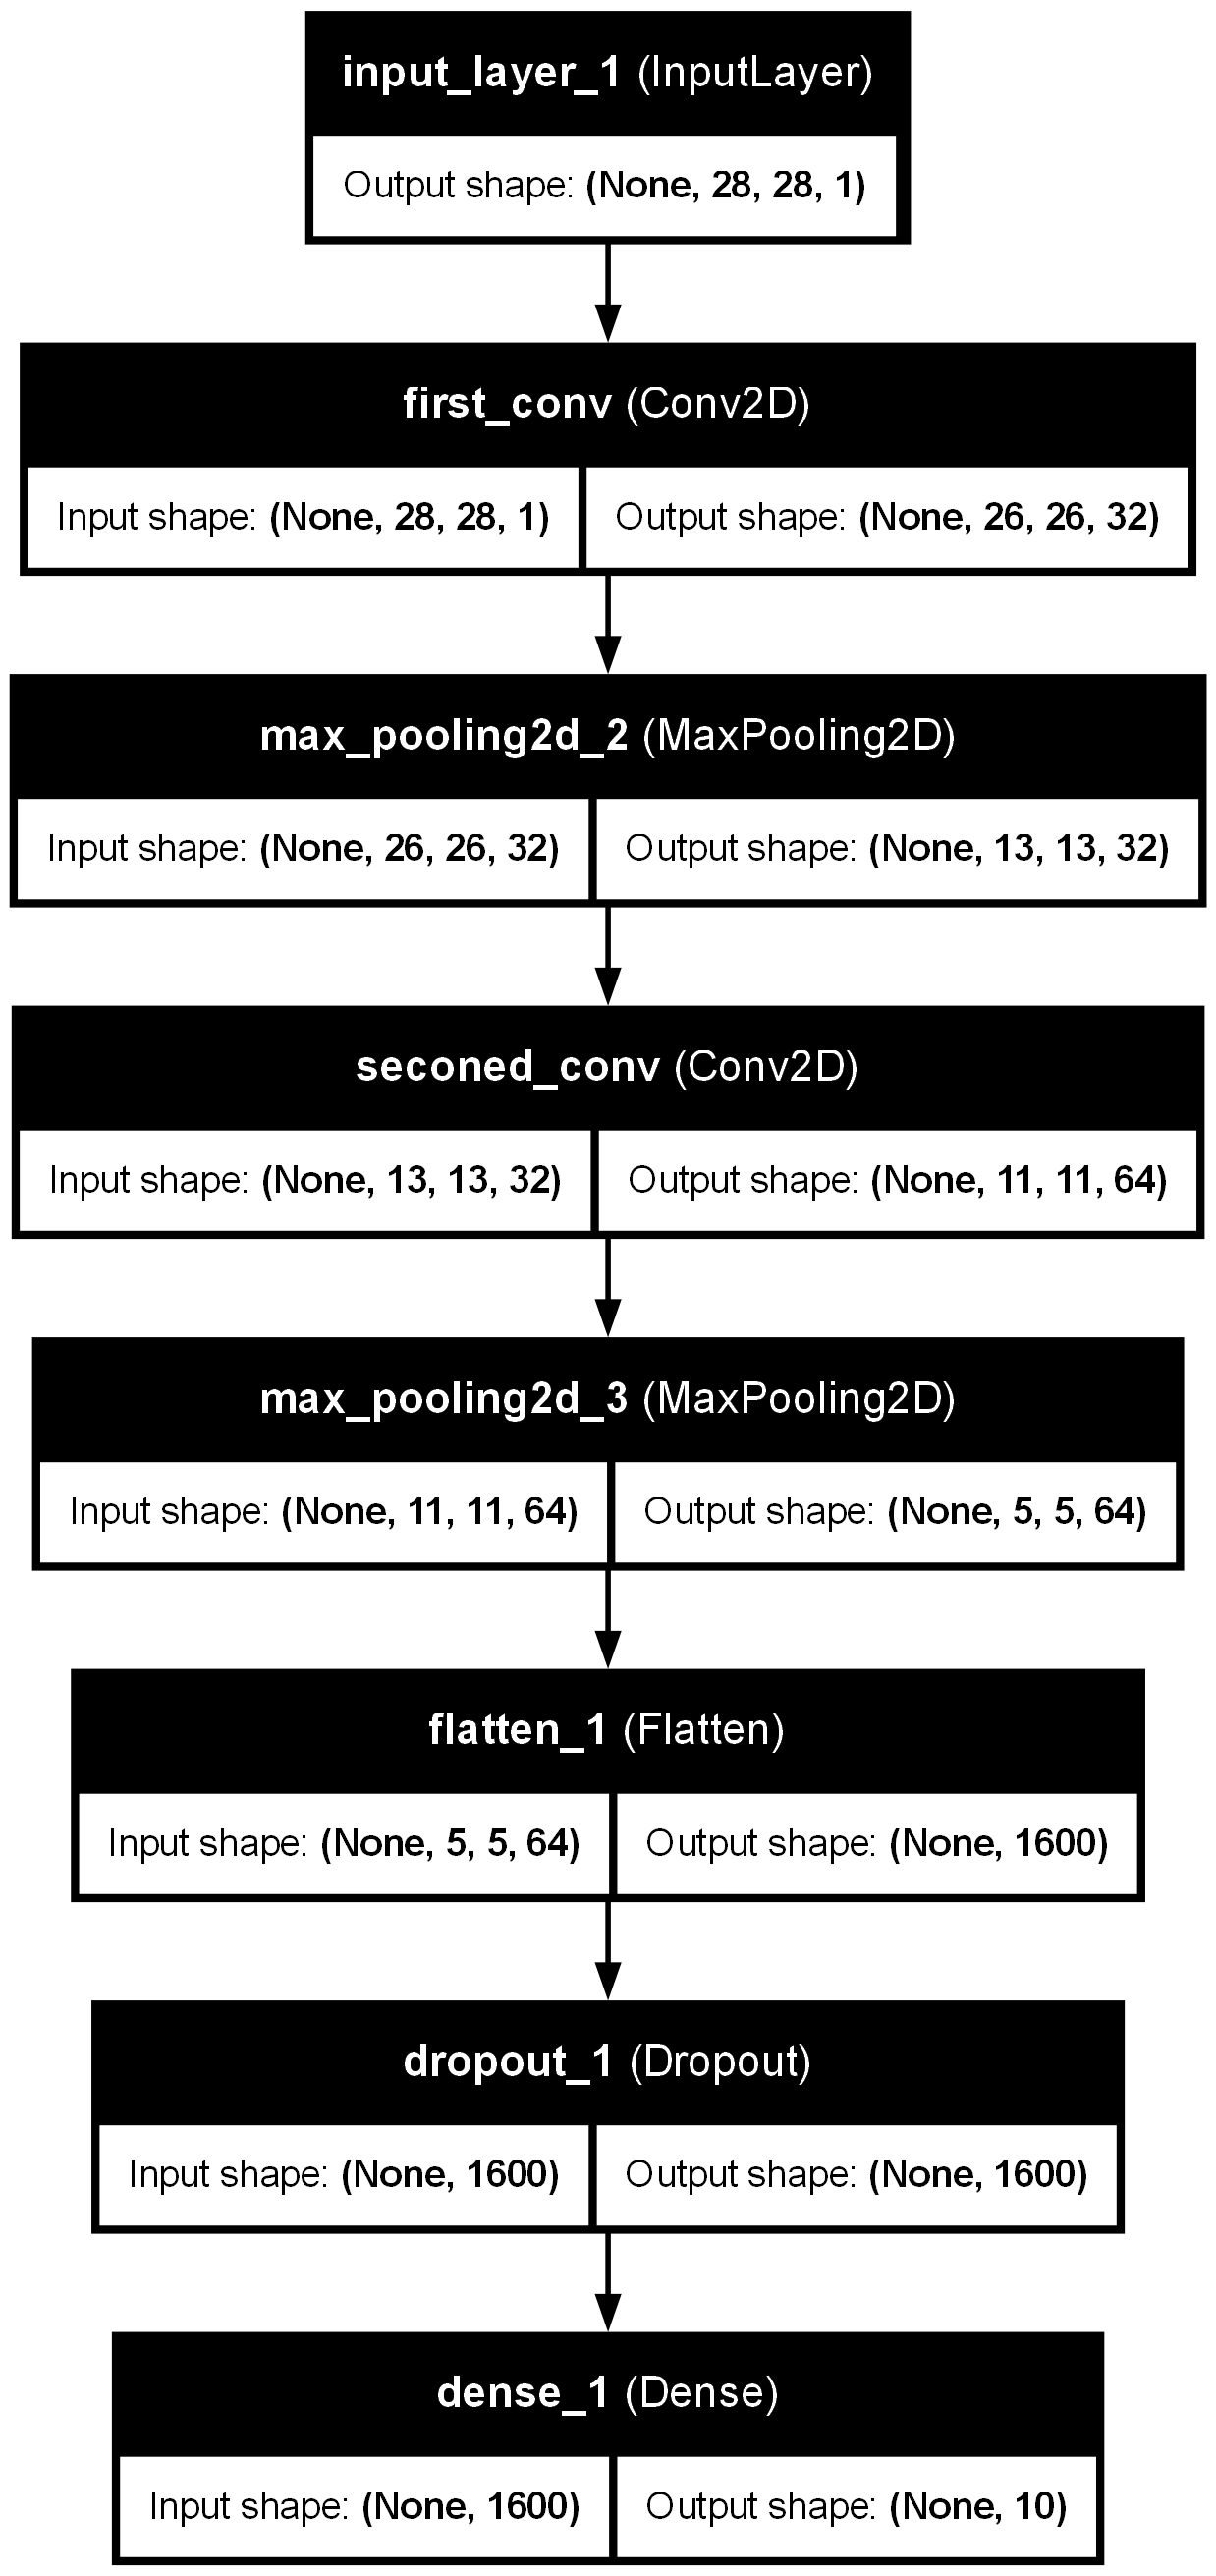

In [38]:
tf.keras.utils.plot_model(model,"my_first_model_with_shape_info.png", show_shapes=True,
                          show_layer_names=True)

In [95]:
ds_train_final= ds_train_per.shuffle(buffer_size = 1000).batch(64)
ds_test_final= ds_test_per.batch(64)

In [97]:
print(next(iter(ds_train_final.take(1)))[0].shape)
print(next(iter(ds_train_final.take(1)))[1].shape)

(64, 28, 28, 1)
(64, 10)


In [99]:
model.compile(
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

model_history = model.fit(ds_train_final,epochs=2)


Epoch 1/2
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9812 - loss: 0.0609
Epoch 2/2
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9839 - loss: 0.0534


In [100]:
test_scores = model.evaluate(ds_test_final,verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

157/157 - 0s - 3ms/step - accuracy: 0.9890 - loss: 0.0310
Test loss: 0.030989643186330795
Test accuracy: 0.9890000224113464


در **API تابعی**، مدیریت چندین ورودی و خروجی بسیار آسان است، در حالی که **API Sequential** چنین قابلیتی ندارد.  

برای مثال، اگر بخواهید سیستمی برای **رتبه‌بندی تیکت‌های مشتری بر اساس اولویت** و **ارسال آن‌ها به بخش مناسب** ایجاد کنید، مدل شما سه ورودی خواهد داشت:  

- **عنوان تیکت** (ورودی متنی)،  
- **متن اصلی تیکت** (ورودی متنی)، و  
- **برچسب‌های اضافه‌شده توسط کاربر** (ورودی دسته‌بندی‌شده).  

این مدل همچنین دو خروجی خواهد داشت:  

- **امتیاز اولویت** بین ۰ و ۱ (خروجی اسکالر با تابع سیگموئید)، و  
- **بخشی که باید تیکت را مدیریت کند** (خروجی سافت‌مکس روی مجموعه‌ای از بخش‌ها).  

API تابعی انعطاف‌پذیری بیشتری برای طراحی چنین مدل‌هایی فراهم می‌کند.

## nlp

In [109]:
# تعداد برچسب‌های منحصربه‌فرد مسائل
num_tags = 12  
# اندازه واژگان به‌دست‌آمده هنگام پیش‌پردازش داده‌های متنی
num_words = 10000  
# تعداد دپارتمان‌ها برای پیش‌بینی
num_departments = 4  

# تعریف لایه ورودی برای عنوان (دنباله‌ای با طول متغیر از اعداد صحیح)
title_input = keras.Input(
    shape=(None,), name="title"
)  
# تعریف لایه ورودی برای بدنه متن (دنباله‌ای با طول متغیر از اعداد صحیح)
body_input = keras.Input(shape=(None,), name="body")  
# تعریف لایه ورودی برای برچسب‌ها (بردارهای باینری با اندازه num_tags)
tags_input = keras.Input(
    shape=(num_tags,), name="tags"
)  

# تبدیل هر کلمه در عنوان به یک بردار 64‌بعدی
title_features = layers.Embedding(num_words, 64)(title_input)
# تبدیل هر کلمه در بدنه متن به یک بردار 64‌بعدی
body_features = layers.Embedding(num_words, 64)(body_input)

# کاهش دنباله کلمات تعبیه‌شده در عنوان به یک بردار 128‌بعدی
title_features = layers.LSTM(128)(title_features)
# کاهش دنباله کلمات تعبیه‌شده در بدنه به یک بردار 32‌بعدی
body_features = layers.LSTM(32)(body_features)

# ادغام تمام ویژگی‌های موجود در یک بردار بزرگ با استفاده از اتصال
x = layers.concatenate([title_features, body_features, tags_input])

# افزودن یک رگرسیون لجستیک برای پیش‌بینی اولویت در بالای ویژگی‌ها
priority_pred = layers.Dense(1, name="priority")(x)
# افزودن یک طبقه‌بند دپارتمان در بالای ویژگی‌ها
department_pred = layers.Dense(num_departments, name="department")(x)

# ایجاد یک مدل کامل برای پیش‌بینی اولویت و دپارتمان
model = keras.Model(
    inputs=[title_input, body_input, tags_input],
    outputs=[priority_pred, department_pred],
)

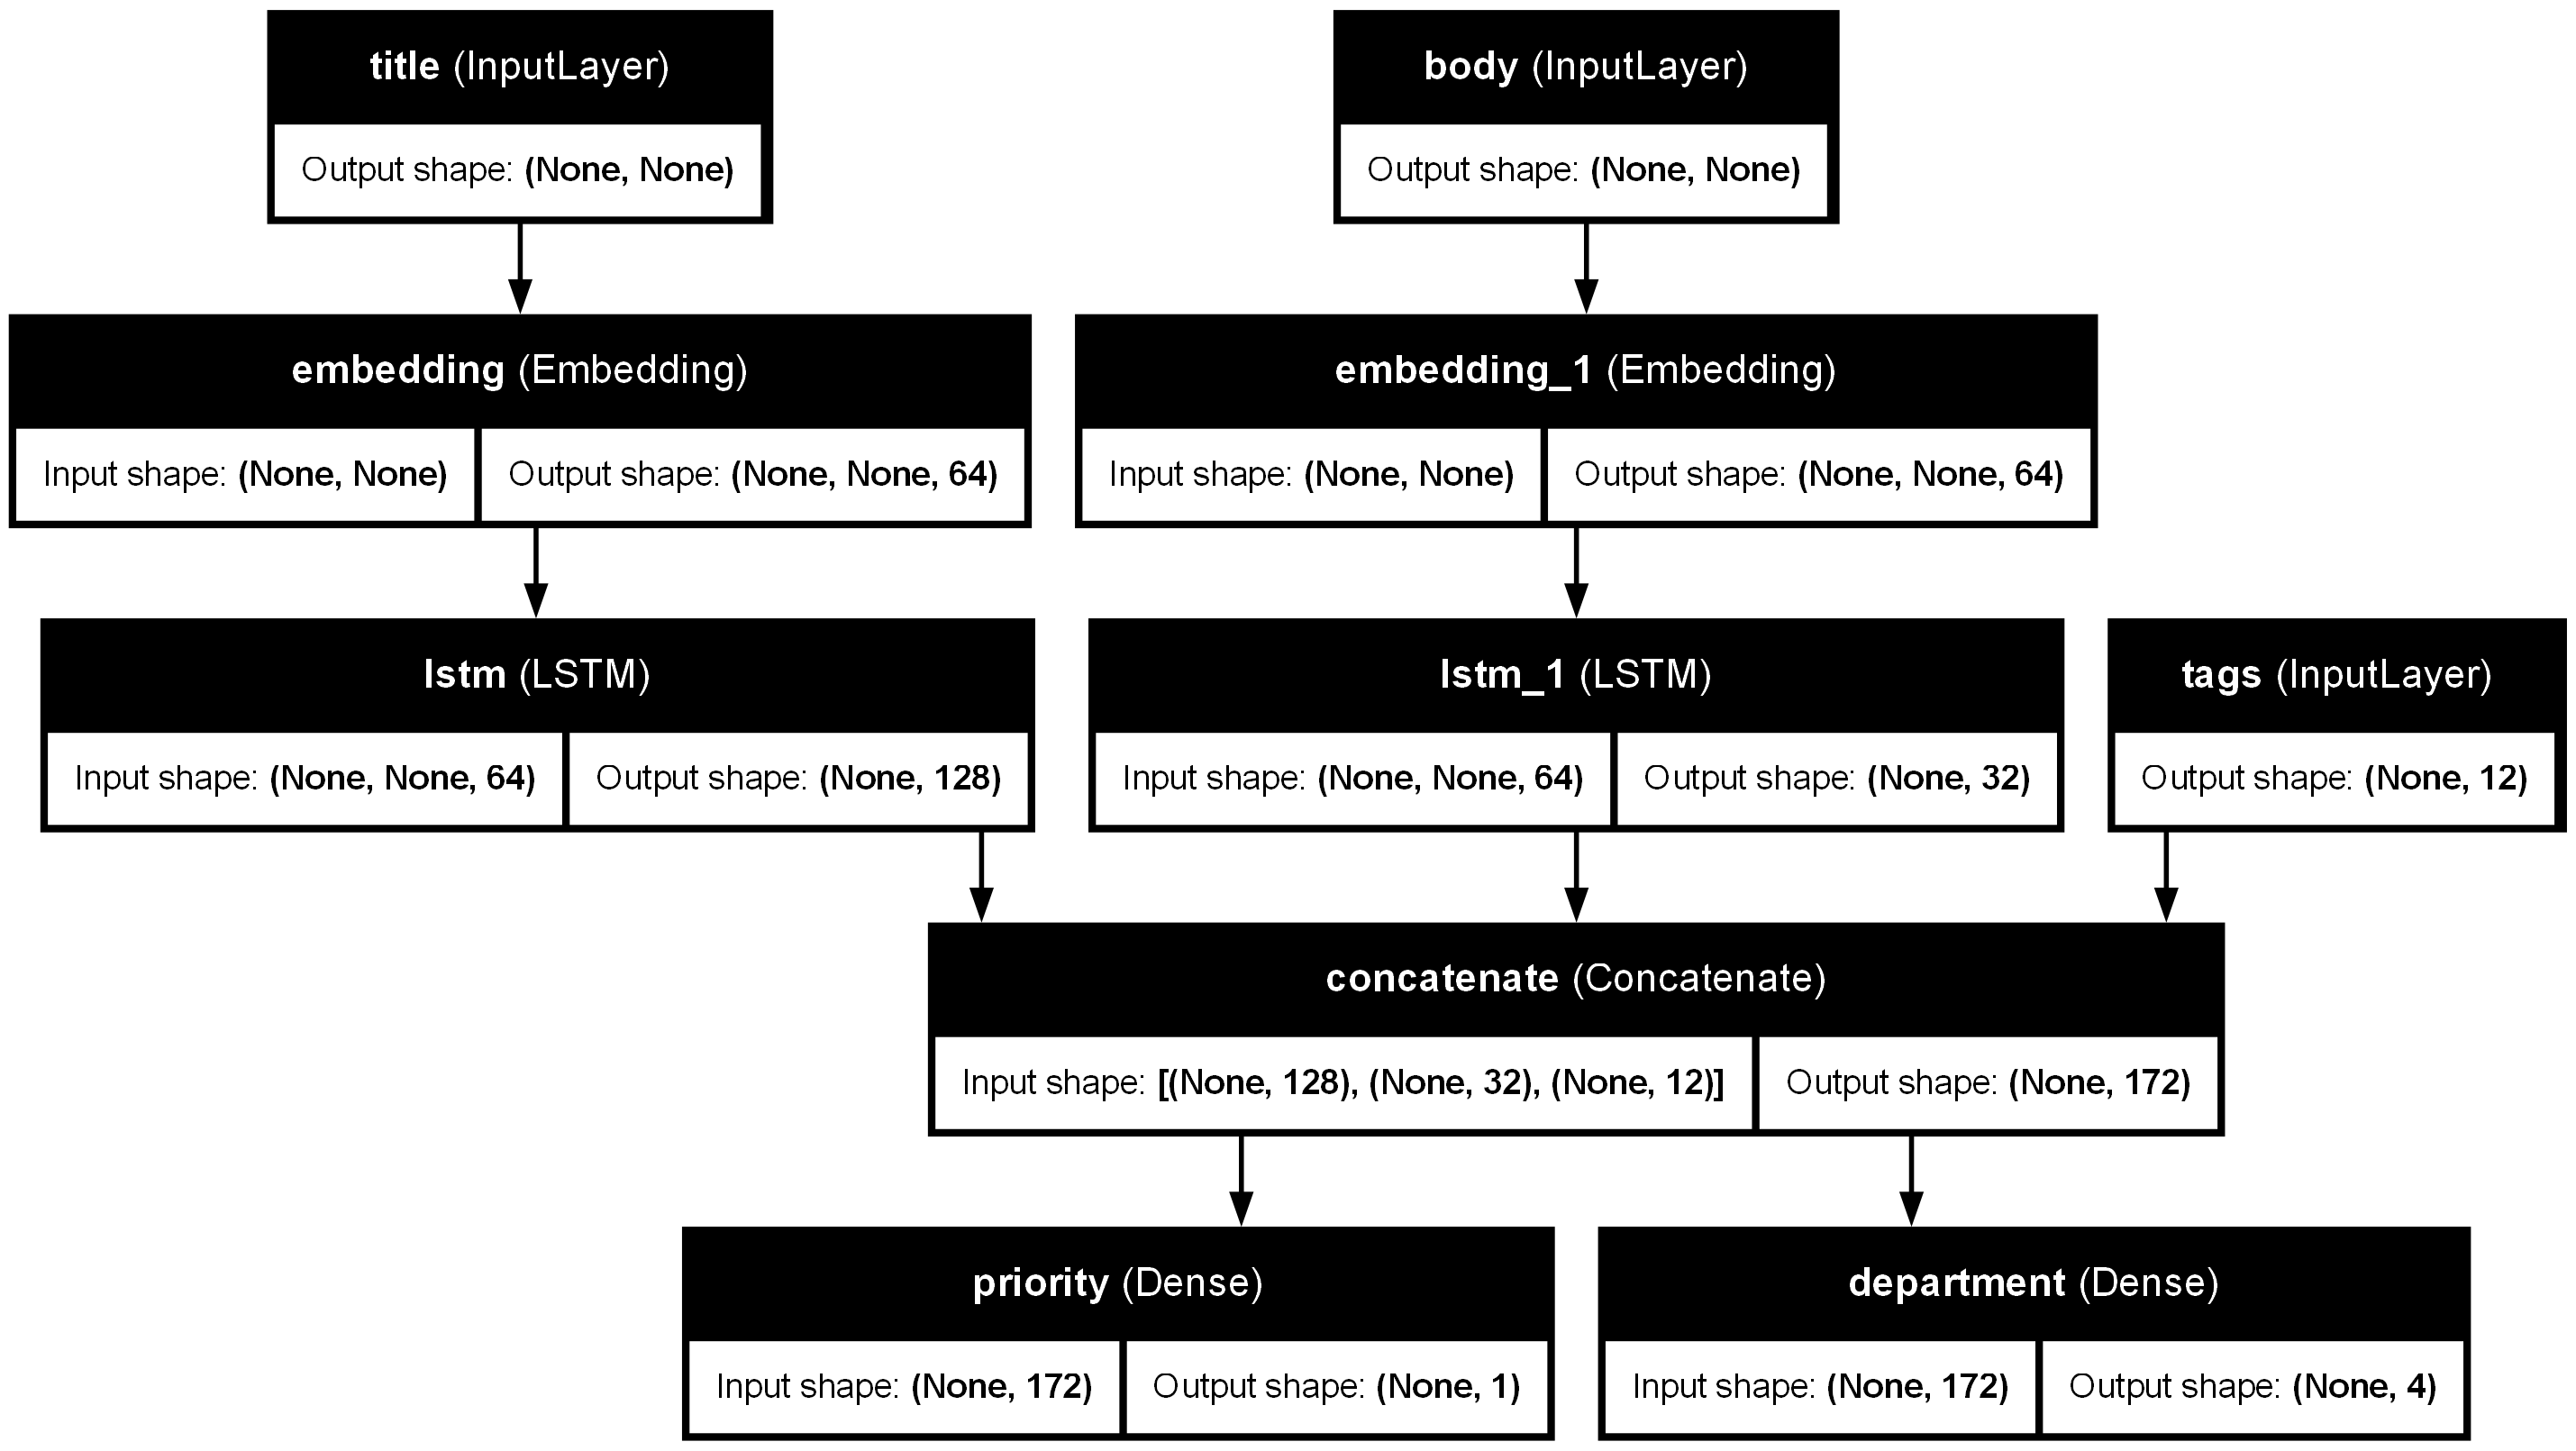

In [114]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True,show_layer_names=True)

In [120]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss={
        "priority": keras.losses.BinaryCrossentropy(from_logits=True),
        "department": keras.losses.CategoricalCrossentropy(from_logits=True),
    },
    loss_weights={"priority": 1.0, "department": 0.2},
)

In [123]:
# Dummy input data
import numpy as np
title_data = np.random.randint(num_words, size=(1280, 10))
body_data = np.random.randint(num_words, size=(1280, 100))
tags_data = np.random.randint(2, size=(1280, num_tags)).astype("float32")

# Dummy target data
priority_targets = np.random.random(size=(1280, 1))
dept_targets = np.random.randint(2, size=(1280, num_departments))

model.fit(
    {"title": title_data, "body": body_data, "tags": tags_data},
    {"priority": priority_targets, "department": dept_targets},
    epochs=2,
    batch_size=32,
)

Epoch 1/2
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - department_loss: 2.8106 - loss: 1.2623 - priority_loss: 0.7001
Epoch 2/2
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - department_loss: 2.8445 - loss: 1.2666 - priority_loss: 0.6977


## Rednet (skip conction)

In [128]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
model.summary()

Model: "toy_resnet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ img (InputLayer)    │ (None, 32, 32, 3) │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 30, 30,    │        896 │ img[0][0]         │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 28, 28,    │     18,496 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 9, 9, 64)  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 9, 9, 64)  │     36,928 │ max_pooling2d_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 9, 9, 64)  │     36,928 │ conv2d_2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 9, 9, 64)  │          0 │ conv2d_3[0][0],   │
│                     │                   │            │ max_pooling2d_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 9, 9, 64)  │     36,928 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 9, 9, 64)  │     36,928 │ conv2d_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 9, 9, 64)  │          0 │ conv2d_5[0][0],   │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 7, 7, 64)  │     36,928 │ add_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ conv2d_6[0][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 256)       │     16,640 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 256)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 10)        │      2,570 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 223,242 (872.04 KB)

 Trainable params: 223,242 (872.04 KB)

 Non-trainable params: 0 (0.00 B)

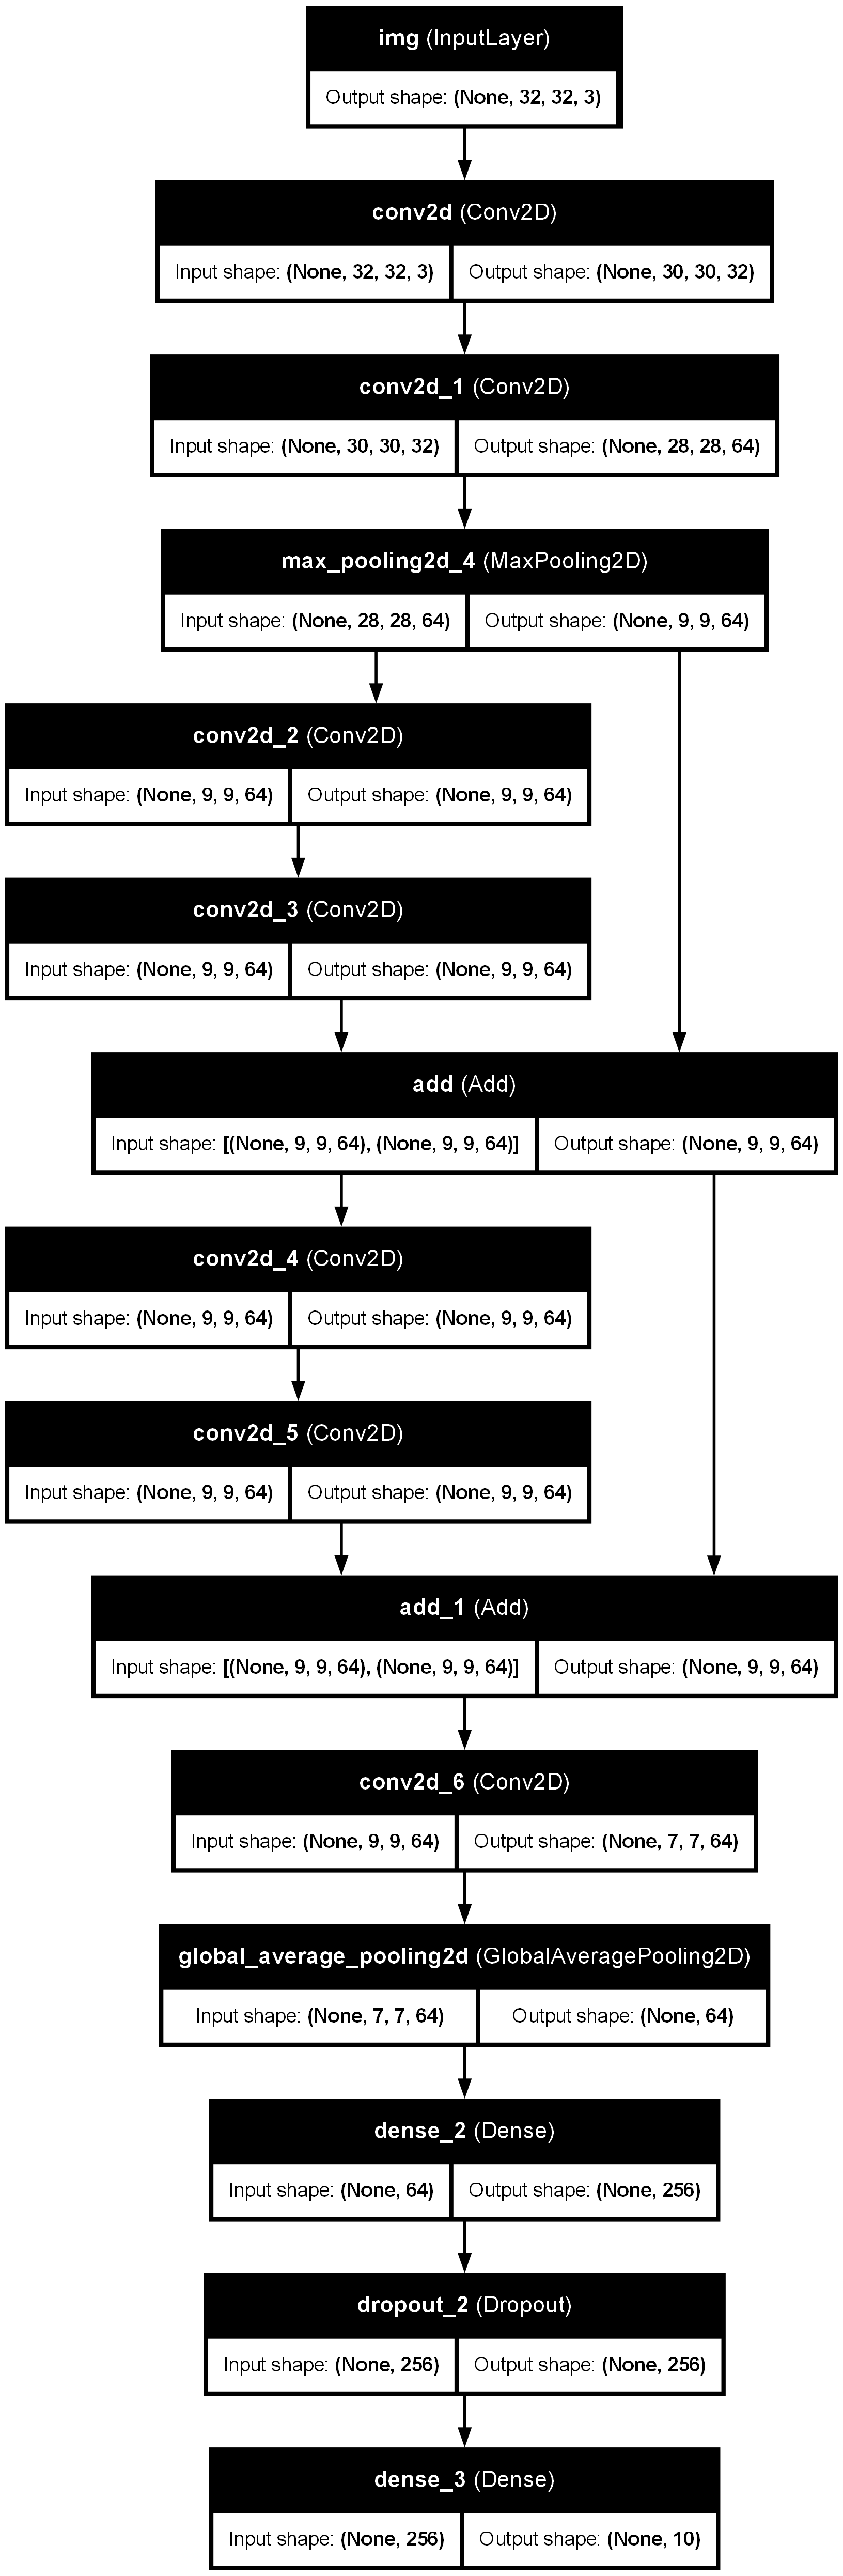

In [134]:
keras.utils.plot_model(model , 'resnet_me.png' , show_shapes=True , show_layer_names=True)

In [138]:
ds, info = tfds.load("cifar10", split=["train[:80%]", "train[80%:]", "test"], as_supervised=True, with_info=True)

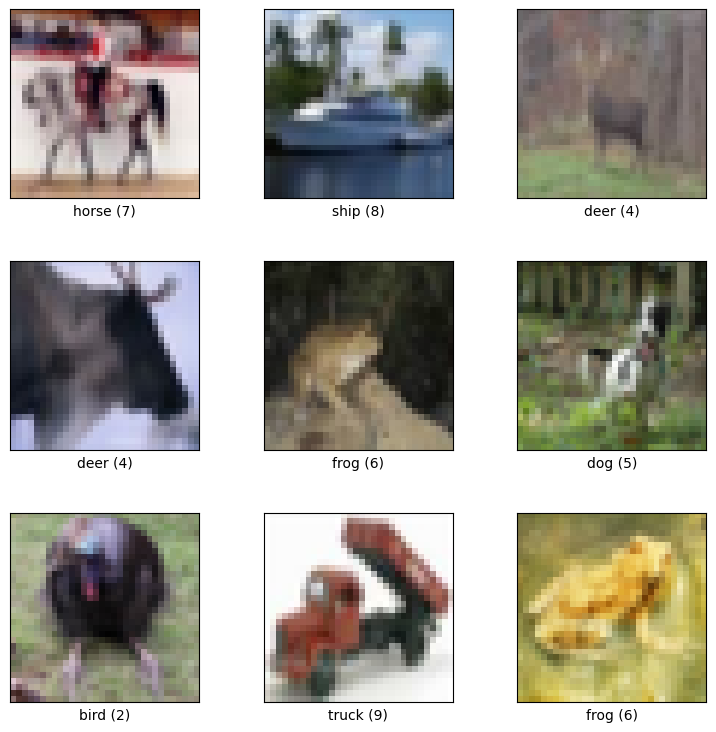

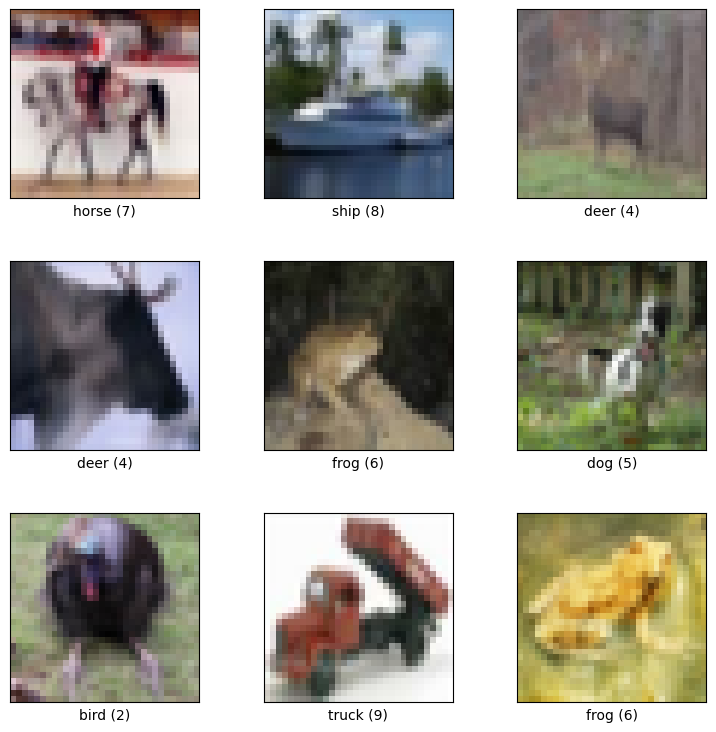

In [142]:
tfds.visualization.show_examples(ds[0], info)

In [145]:
ds_train = ds[0]
ds_val = ds[1]
ds_test = ds[2]

In [148]:
ds_train = ds_train.map(preprocess_dataset).shuffle(1000).batch(64)
ds_val = ds_val.map(preprocess_dataset).batch(64)
ds_test = ds_test.map(preprocess_dataset).batch(64)

In [151]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["acc"],
)
# We restrict the data to the first 1000 samples so as to limit execution time
# on Colab. Try to train on the entire dataset until convergence!
model.fit(ds_train, validation_data=ds_val, epochs=1)

625/625 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - acc: 0.1893 - loss: 2.1028 - val_acc: 0.3616 - val_loss: 1.6498
